In [103]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [104]:
g=9.8
u=25
ang=40
ux=u*np.cos(np.radians(ang))
uy=u*np.sin(np.radians(ang))
x0=np.array([0,0,ux,uy])

dt=0.1

In [105]:
M=np.array([1,0,dt,0,0,1,0,dt,0,0,1,0,0,0,0,1]).reshape(4,4)
M

array([[1. , 0. , 0.1, 0. ],
       [0. , 1. , 0. , 0.1],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. ]])

In [106]:
B=np.array([0,-0.5*g*dt**2,0,-g*dt])

In [107]:
tp=uy/g
steps=int(2*tp/dt)+2

In [108]:
X=np.zeros((steps,len(x0)))

In [109]:
x=x0.copy()
for i in range(steps):
    X[i]=x.copy()
    x=M@x+B

Text(0.5, 1.0, 'vertical displacement vs time')

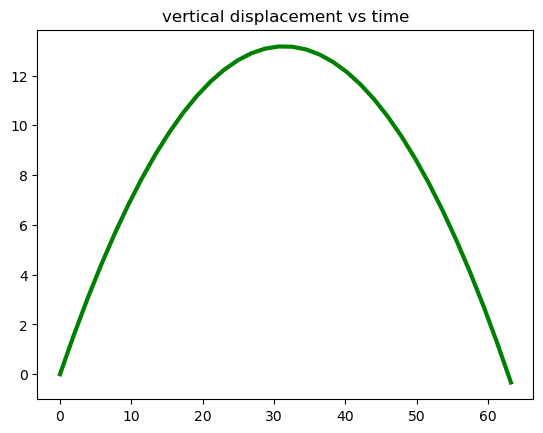

In [110]:
plt.plot(X[:,0],X[:,1],'g-',lw=3)
plt.title('vertical displacement vs time')

In [115]:
def f1(t,x):   # find the derivative
    x,y,vx,vy=x
    return np.array([vx,vy,0,-g])

def rk1(t,x,f,dt):
    k1=f(t,x)*dt
    return k1

In [116]:
x=x0.copy()
X_1=np.zeros((int(steps/0.1),len(x0)))
for i in range(int(steps/0.1)):
    X_1[i]=x.copy()
    x=x+rk1(0,x,f1,dt*0.1)

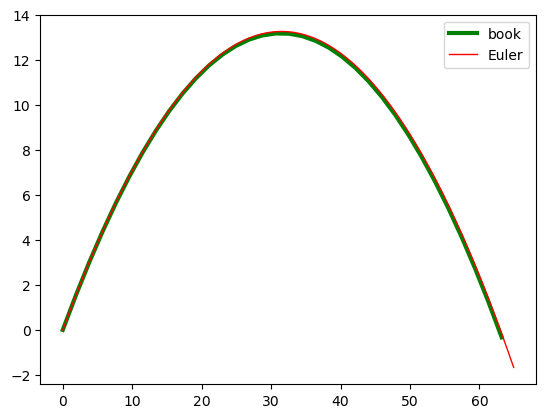

In [117]:
plt.plot(X[:,0],X[:,1],'g-',lw=3,label='book')
plt.plot(X_1[:,0],X_1[:,1],'r-',lw=1,label='Euler')
plt.legend()

In [118]:
# in the instance. the direct Euler's method
# introduce a strong artifact to the system
# which increases the system's total energy,
# Theoretically, if we continue to reduce dt,
# the model will be close to the true values.
# but it will increase the computing power, hense waste energy. 

In [137]:
def rk2(t,x,f,dt):
    k1=f(t,x)*dt
    k2=f(t+dt/2,x+k1/2)*dt  #half time pace, half step pace
    return k2
    
    

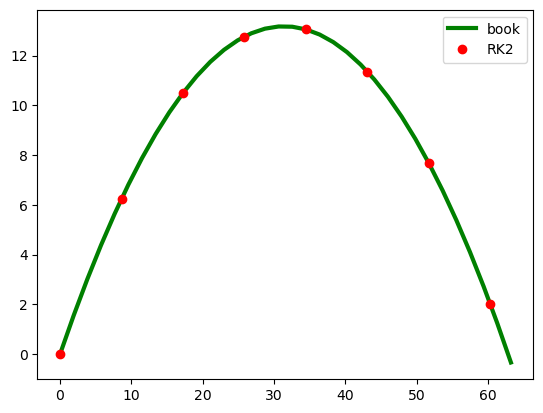

In [138]:
x=x0.copy()
X_2=np.zeros((int(steps/4.2),len(x0)))
for i in range(int(steps/4.2)):
    X_2[i]=x.copy()
    x=x+rk2(0,x,f1,dt*4.5)

plt.plot(X[:,0],X[:,1],'g-',lw=3,label='book')
plt.plot(X_2[:,0],X_2[:,1],'ro',lw=1,label='RK2')
plt.legend()

In [139]:
# RK2 can achieve 2nd order accuracy. 
# the projectile problem happens to be a 2nd order system
# So, RK2 can produce an accurate answer to this problem. 

In [140]:
import scipy as sp


In [141]:
def rk4(t,x,f,dt):
    k1=f(t,x)*dt
    k2=f(t+dt/2,x+k1/2)*dt  # half time, half step
    k3=f(t+dt/2,x+k2/2)*dt  # half time, half step
    k4=f(t+dt,x+k3)*dt      # one time, one step
    k=(k1+2*k2+2*k3+k4)/6
    return k
    

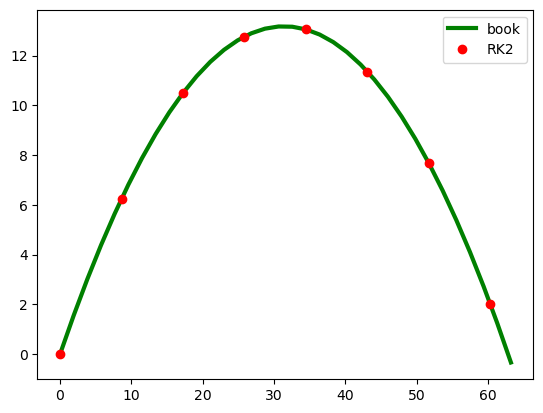

In [142]:
x=x0.copy()
X_4=np.zeros((int(steps/4.2),len(x0)))
for i in range(int(steps/4.2)):
    X_4[i]=x.copy()
    x=x+rk4(0,x,f1,dt*4.5)

plt.plot(X[:,0],X[:,1],'g-',lw=3,label='book')
plt.plot(X_4[:,0],X_4[:,1],'ro',lw=1,label='RK2')
plt.legend()